# Multivariate Time Series with RNN-LSTM



Appliance Energy Usage


http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('../content/energydata_complete.csv', index_col='date', infer_datetime_format=True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [5]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

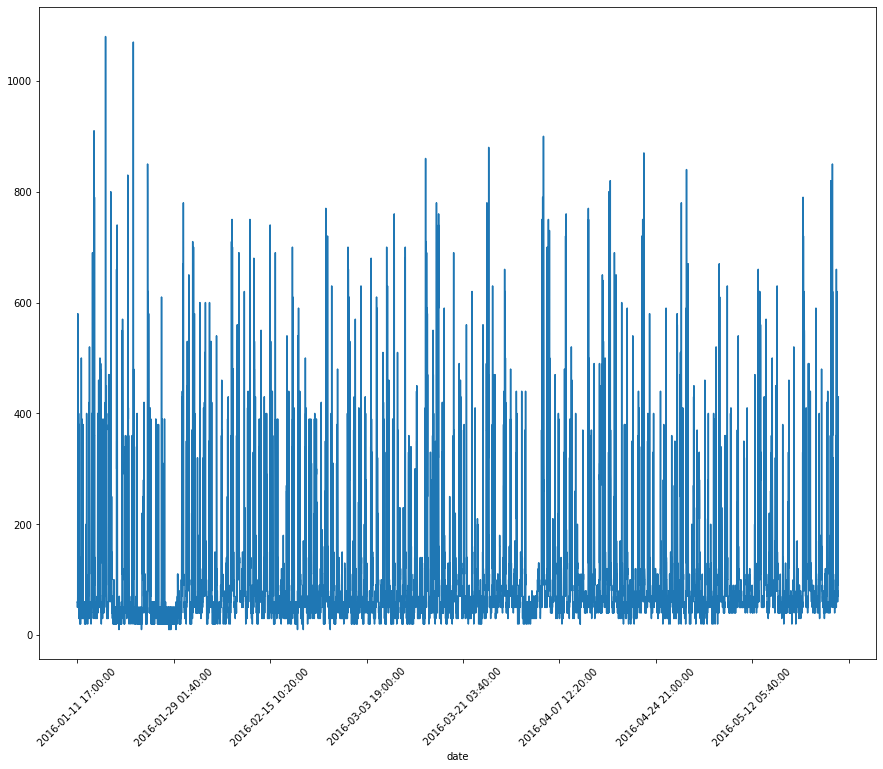

In [10]:
df['Appliances'].plot(figsize=(15,12));
plt.xticks(rotation=45);

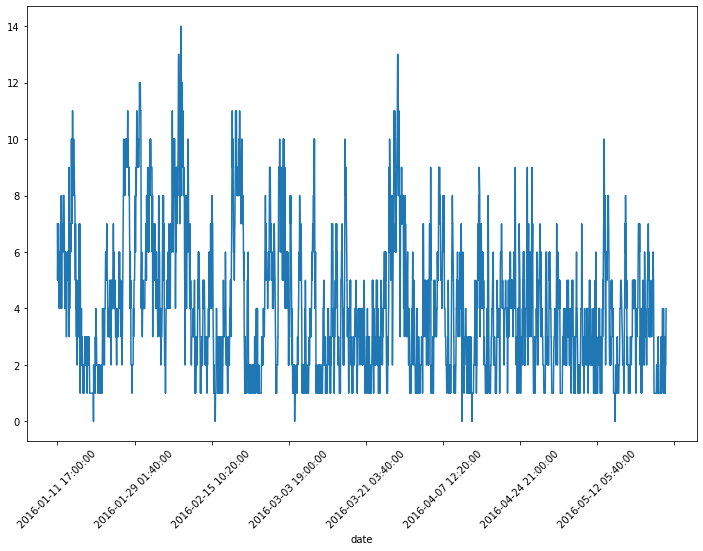

In [11]:
df['Windspeed'].plot(figsize=(12,8));
plt.xticks(rotation=45);

## Train Test Split

In [ ]:
len(df)

19735

In [12]:
df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [13]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [14]:
df = df.loc['2016-05-01':]

In [15]:
df = df.round(2)   #round off columns

In [16]:
df.head(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.4,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.5,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24


In [17]:
len(df)

3853

In [18]:
# total records per day => total minutes per day / frequency of 10 minutes
24 * 60 / 10

144.0

In [19]:
test_days = 2 # 2 days of data as testing data

In [25]:
test_index_spoint = test_days * 144
test_index_spoint

288

In [26]:
# Splitting

train = df.iloc[:-test_index_spoint]
test = df.iloc[-test_index_spoint: ]


In [27]:
train.shape, test.shape

((3565, 28), (288, 28))

In [28]:
train.tail(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 17:50:00,90,0,24.5,37.63,24.03,34.43,25.1,36.99,24.29,37.93,...,22.0,37.36,16.42,756.12,55.17,1.83,37.83,7.38,39.36,39.36
2016-05-25 18:00:00,100,0,24.5,38.00,24.00,34.40,25.1,36.73,24.29,37.86,...,22.0,37.36,16.50,756.10,56.00,2.00,40.00,7.70,38.63,38.63


In [29]:
test.head(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.5,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.0,37.23,16.48,756.1,55.83,2.0,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.5,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.0,37.36,16.47,756.1,55.67,2.0,36.33,7.53,31.16,31.16


## Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Time series Data Generator

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
length = 144 # for one day 
batch_size = 1

In [36]:
generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                   length=length, batch_size=1)

In [41]:
# What does the first batch look like?
X,y = generator[0]

print(f'X : \n{X}\n')
print(f'y : \n {y}')

X : 
[[[0.03896104 0.         0.13798978 ... 0.21301775 0.30618371 0.30618371]
  [0.05194805 0.         0.12947189 ... 0.21420118 0.22473484 0.22473484]
  [0.03896104 0.         0.12606474 ... 0.2147929  0.43626176 0.43626176]
  ...
  [0.05194805 0.         0.32367973 ... 0.15680473 0.43406044 0.43406044]
  [0.05194805 0.         0.30834753 ... 0.14970414 0.64078447 0.64078447]
  [0.03896104 0.         0.30834753 ... 0.14319527 0.75185111 0.75185111]]]

y : 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


## Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Reflect the mulitvariate features for number of features 

In [43]:
scaled_train.shape

(3565, 28)

In [44]:
n_features = scaled_train.shape[1]
n_features

28

In [48]:
model = Sequential()

# Simple LSTM Layer
model.add(LSTM(100, input_shape=(length, n_features)))


model.add(Dense(n_features))
          
model.compile(optimizer='adam', loss='mse')

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               51600     
                                                                 
 dense_2 (Dense)             (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


-----

### Early Stopping 

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=2)

### Validation Generator

In [56]:
validation_generator = TimeseriesGenerator(
    data=scaled_test,
    targets=scaled_test,
    length=length, 
    batch_size=batch_size
    )

## Model Training

In [57]:
model.fit(generator, 
             epochs=5,
             validation_data = validation_generator,
             callbacks=[early_stopping],
             verbose=1)


Epoch 1/5
3421/3421 [==============================] - 174s 50ms/step - loss: 0.0118 - val_loss: 0.0113
Epoch 2/5
3421/3421 [==============================] - 165s 48ms/step - loss: 0.0079 - val_loss: 0.0087
Epoch 3/5
3421/3421 [==============================] - 165s 48ms/step - loss: 0.0075 - val_loss: 0.0085
Epoch 4/5
3421/3421 [==============================] - 166s 48ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 5/5
3421/3421 [==============================] - 164s 48ms/step - loss: 0.0072 - val_loss: 0.0083


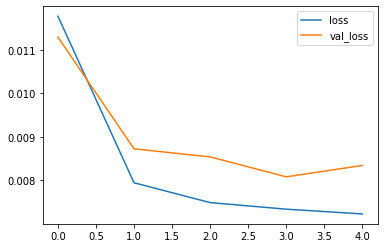

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluate on Test Data

In [59]:
test_predictions = []

first_evaluation_batch = scaled_train[-length: ]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    
    test_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

## Inverse Transformations and Compare

In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions_df = pd.DataFrame(data=true_predictions, columns=test.columns)

In [62]:
true_predictions_df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,103.385470,2.032846,24.455147,37.758760,24.340987,35.057066,25.144127,37.037261,24.057180,37.172930,...,21.954652,37.815933,16.614504,756.074033,57.158024,2.074070,40.320491,7.895160,26.826147,26.914437
1,104.507594,2.835613,24.402926,37.791704,24.445493,34.902717,25.134265,37.175230,23.945476,37.121970,...,21.909294,38.066842,16.615400,755.975111,58.098166,2.127806,39.778234,8.111840,26.845412,26.851363
2,105.095413,3.289115,24.354128,37.776841,24.535941,34.689050,25.104925,37.291062,23.841683,37.101590,...,21.868170,38.273062,16.545949,755.925439,59.135831,2.164633,39.117981,8.289891,26.866386,26.809662
3,106.193086,3.554654,24.309156,37.795454,24.620985,34.511314,25.079374,37.400195,23.764534,37.110625,...,21.830868,38.463243,16.455536,755.890494,60.192415,2.197877,38.628342,8.458603,26.841290,26.768985
4,107.068728,3.719242,24.267077,37.839579,24.706269,34.362522,25.055875,37.505359,23.706606,37.136700,...,21.795595,38.634275,16.360830,755.867751,61.234535,2.232980,38.329519,8.616026,26.826258,26.747734


## Save Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save('../content/multivariate.h5')